# <center> IMAGE PROCESSING </center>

##### <center> <font style="color:red"> ** LINK VIDEO DEMO: https://www.youtube.com/watch?v=qDIapY3J00g **</font><center>
- ##### Name: Lý Nhật Hào
- ##### MSSV: 21127041
- ##### Class: 21CLC04
Trong file.ipynb trên sẽ bao gồm:
- `source code` giải quyết yêu cầu đồ án 2 đó là cài đặt chương trình xử lý hình ảnh theo yêu cầu như sau:
    - Tăng độ sáng.
    - Tăng độ tương phản.
    - Lật ảnh theo chiều NGANG hoặc DỌC.
    - Chuyển đổi sang ảnh trắng đen.
    - Chuyển đổi sang ảnh Sepia.
    - Làm mờ ảnh.
    - Làm sắc nét ảnh.
    - Cắt ảnh.
    - Hiển thị ảnh trong khung tròn.
    - Hiển thị ảnh trong khung ellips (NÂNG CAO).
- `Chú thích` ý nghĩa cơ bản của những hàm được cài đặt cũng như một vài biến quan trọng được cài đặt trong file code.

##### <center> <font style="color:red"> ** Những chú thích, kết quả, phân tích, nhận xét và bàn luận chi tiết của đồ án trên sẽ được triển khai sâu hơn trong file 21127041.PDF **</font><center>

In [91]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as im
import time

### <font style="color:red"> Tăng độ sáng ảnh </font>
- Nguyên tắc tăng độ sáng ảnh của hàm `Bright()` hoạt động với nguyên tắc thêm cường độ sáng tương ứng vào từng pixel của bức ảnh đầu vào. Cường độ sáng được tính toán bằng cách nhân giá trị của tham số `temp` cho 255, sau đó thêm giá trị này vào giá trị của mỗi pixel trong ảnh.

- Sau khi thêm cường độ sáng, hàm kiểm tra các giá trị pixel có lớn hơn 255 hay không. Nếu có, các giá trị này sẽ được đặt lại thành 255 để tránh tràn số. 

- Cuối cùng, hàm chuyển đổi ảnh sang kiểu số nguyên 8-bit không dấu (unsigned 8-bit integer) và trả về ảnh đã được làm sáng là `picture2`.

In [92]:
def Bright(picture2,picture1, temp = 0.4):
    picture2 = picture2.astype(int)
    picture2 = picture2 + int(255*temp)
    picture2[255<picture2] = 255
    picture2 = picture2.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT BRIGHTEN')
    ax[1].imshow(picture2)
    ax[1].set_title('BRIGHTEN PICTURE')
    for ax in fig.axes:
        ax.axis('on')
    
    return picture2

### <font style="color:red">  Tăng độ tương phản ảnh </font>

* Nguyên tắc tăng độ tương phản ảnh của hàm `Contrast()` đó là cách áp dụng một hệ số tương phản được xác định bởi tham số `temp`.

    - Đầu tiên, hàm chuyển đổi ảnh đầu vào sang kiểu số thực để cho phép tính toán số học. Sau đó, hàm chuẩn hoá ảnh bằng cách chia tất cả các giá trị pixel cho 255 và trừ đi 0.5. Kết quả là ảnh sẽ có giá trị pixel từ -0.5 đến 0.5

    - Sau đó, hàm nhân ảnh với giá trị (temp+1)^2, với `temp` là tham số được truyền vào. Kết quả là các giá trị pixel trong ảnh sẽ được tăng lên nếu `temp` lớn hơn 0, và giảm đi nếu temp nhỏ hơn 0.

    - Sau khi tăng tương phản, hàm chuẩn hoá lại ảnh bằng cách nhân với 255 và cộng với 0.5

* Hàm chuyển đổi lại ảnh sang kiểu số nguyên 8-bit không dấu (unsigned 8-bit integer) và trả kết quả ra màn hình ảnh đã được tăng độ tương phản

In [93]:
def Contrast(picture2, picture1, temp = 0.5):
    picture2 = picture2.astype(float)
    
    picture2 = picture2/255 - 0.5
    picture2 = picture2* (float(temp+1)**2)
   
    picture2 = 255*(0.5+picture2) 
    picture2[picture2 > 255] = 255
    picture2[picture2 < 0] = 0
    picture2 = picture2.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT CONTRAST')
    ax[1].imshow(picture2)
    ax[1].set_title('CONTRAST PICTURE')
    for ax in fig.axes:
        ax.axis('on')

    return picture2

### <font style="color:red">  Lật ảnh theo hướng chỉ định </font>

* Hàm `Flippic` có công dụng thực hiện phép lật hình ảnh theo một trục cụ thể được chỉ định. Cụ thể, các bước là:

    - Dùng `image.reshape(tam)` để chuyển đổi ảnh thành một mảng 2D có kích thước là `tam`, điều này giúp định hình lại hình ảnh để chuẩn bị cho bước kế tiếp.

    - Dùng `np.flip(image, mode)` để thực hiện phép đảo ngược (flip) hình ảnh theo một trục cụ thể được chỉ định bởi `mode`. Từ đó, hình ảnh sẽ bị đảo ngược.

In [94]:
def Flippic(image,picture1, tam, mode):
    image = image.reshape(tam)
    image = np.flip(image, mode)
    
    image = image.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT FLIP')
    ax[1].imshow(image)
    ax[1].set_title('FLIP PICTURE')
    for ax in fig.axes:
        ax.axis('on')    
    image = image.flatten()
    return image

### <font style="color:red"> Chuyển ảnh sang tone màu đen trắng </font>

Hàm `Blackwhite` có công dụng là chuyển đổi hình ảnh thành hình ảnh đen trắng (black and white) sử dụng một phương pháp đơn giản của việc trộn các kênh màu. Nó sử dụng một phương pháp đơn giản của việc trộn các kênh màu để chuyển đổi hình ảnh thành hình ảnh đen trắng và trả về kết quả đó. Các hệ số `x, y, z` được sử dụng để điều chỉnh mức độ ảnh hưởng của từng kênh màu (đỏ, xanh lá cây và xanh lam) trong quá trình chuyển đổi.

In [95]:
def Blackwhite(picture2, picture1, x = 0.399, y = 0.687, z = 0.214):
    picture2 = picture2.astype(float)
    sum=x+y+z
    picture2 = np.dot(picture2, np.array([x, y, z])/(sum))
    picture2 = (picture2*np.ones((3,1))).transpose()
    
    picture2 = picture2.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT GREY')
    ax[1].imshow(picture2)
    ax[1].set_title('GREY PICTURE')
    for ax in fig.axes:
        ax.axis('on')
    return picture2

### <font style="color:red"> Chuyển ảnh sang tone màu SEPIA </font>
Hàm sepia thực hiện việc chuyển đổi hình ảnh thành hình ảnh sepia bằng cách áp dụng bộ lọc sepia và tăng độ sâu (depth) của màu sepia bằng cách cộng một giá trị depth vào mỗi phần tử trong mảng hình ảnh. Điều này giúp tăng cường hiệu ứng sepia trên hình ảnh.

In [96]:
def sepia(picture2,picture1, depth=10):
    picture2 = picture2.astype(float)
    
    # Apply sepia filter
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    picture2 = np.dot(picture2, sepia_filter.T)
    
    # Scale the depth of sepia color
    picture2 = picture2 + depth
    
    # Cap the maximum value at 255 and convert back to uint8
    picture2[picture2 > 255] = 255
    picture2 = picture2.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT SEPIA')
    ax[1].imshow(picture2)
    ax[1].set_title('SEPIA PICTURE')
    for ax in fig.axes:
        ax.axis('on')

    return picture2

### <font style="color:red"> Làm mờ ảnh </font>
 Hàm blur thực hiện việc áp dụng bộ lọc mờ lên hình ảnh sử dụng một `kernel` cho trước. Quá trình này bao gồm tính toán tổng giá trị của các pixel lân cận trong vùng đệm và chuẩn hóa kết quả để tạo ra hình ảnh đã được làm mờ.

In [97]:
def blur(picture2, picture1, tam, kernel):
    picture2 = picture2.reshape(tam)
    picture2_result = np.zeros(picture2.shape)
    
    kernelDim = kernel.shape[0]
    kernel_sum = np.sum(kernel)
    # Normalize kernel
    if kernel_sum != 0:
           kernel = kernel / kernel_sum
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/9)
            colShiftValue = int(j - kernelDim/9)
            shiftedArray = np.roll(picture2, (rowShiftValue, colShiftValue), axis=(0, 1))
            picture2_result += shiftedArray * kernel[i,j]
        
    picture2_result = picture2_result.flatten()
    
    # Clip picture2 values between 0 and 255
    picture2_result = np.clip(picture2_result, 0, 255)
    
    picture2 = picture2.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT BLUR')
    ax[1].imshow(picture2)
    ax[1].set_title('BLUR PICTURE')
    for ax in fig.axes:
        ax.axis('on')
    return picture2_result


### <font style="color:red"> Làm sắc nét hình ảnh </font>
- Hàm Sharpen được sử dụng để làm nổi bật các chi tiết và cạnh trong hình ảnh bằng cách áp dụng một bộ lọc để tăng độ sắc nét. Quá trình làm nét (sharpening) giúp làm rõ các đường viền, cải thiện độ tương phản và tạo ra một hình ảnh có độ chi tiết cao hơn.

- Khi áp dụng hàm Sharpen lên một hình ảnh, hình ảnh đầu vào sẽ được làm mờ trước đó để giảm nhiễu và loại bỏ các chi tiết không mong muốn. Sau đó, bộ lọc high-pass edge_kernel được sử dụng để làm nổi bật các cạnh và chi tiết quan trọng trong hình ảnh.

- Quá trình làm nét được thực hiện bằng cách tích chập (convolution) của hình ảnh đã làm mờ với bộ lọc kernel. Bộ lọc này được áp dụng tại mỗi điểm ảnh trong hình ảnh và kết quả là một hình ảnh có độ sắc nét cao hơn, với các chi tiết và cạnh được làm rõ.

In [98]:
def blurforsharp(picture2, picture1, tam, kernel):
    picture2 = picture2.reshape(tam)
    picture2_result = np.zeros(picture2.shape)
    
    kernelDim = kernel.shape[0]
    kernel_sum = np.sum(kernel)
    # Normalize kernel
    if kernel_sum != 0:
           kernel = kernel / kernel_sum
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/9)
            colShiftValue = int(j - kernelDim/9)
            shiftedArray = np.roll(picture2, (rowShiftValue, colShiftValue), axis=(0, 1))
            picture2_result += shiftedArray * kernel[i,j]
        
    picture2_result = picture2_result.flatten()
    # Clip picture2 values between 0 and 255
    picture2_result = np.clip(picture2_result, 0, 255)
    return picture2_result

def Sharpen(picture2, picture1, tam, kernel):
       
    # Apply high-pass filter to enhance edges
    kernelDim = kernel.shape[0]
    
    
    edge_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    picture2 = blurforsharp(picture2, picture1, tam, edge_kernel)

    # Subtract the blurred picture2 from the original picture2 to increase sharpness
    picture2 = picture2.reshape(tam)
    picture2_result = np.zeros(picture2.shape)
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/2)
            colShiftValue = int(j - kernelDim/2)
            shiftedArray = np.roll(picture2, (rowShiftValue, colShiftValue), axis=(0, 1))
            picture2_result += shiftedArray * kernel[i,j]
        
    picture2_result = picture2_result.flatten()
    
    picture2_result[picture2_result > 255] = 255
    picture2_result[picture2_result < 0] = 0
    
    picture2_result = picture2_result.astype(np.uint8)
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT SHARPEN')
    ax[1].imshow(picture2)
    ax[1].set_title('SHARPEN PICTURE')
    for ax in fig.axes:
        ax.axis('on')
    return picture2_result

### <font style="color:red"> Cắt hình ảnh ở trung tâm </font>

- Hàm `Cut()` sử dùng để cắt ảnh thành một hình vuông có kích thước `size`, nằm ở giữa ảnh gốc. Để làm được điều này, hàm tính toán vị trí left, top, right, bottom của hình vuông cần cắt dựa trên kích thước của ảnh gốc.

- Sau khi đã cắt được ảnh, hàm chuyển đổi ảnh đã cắt thành một `mảng NumPy` của các số nguyên không dấu 8-bit (uint8), bằng cách sử dụng hàm `np.array()`. Sau đó, hàm sử dụng thư viện matplotlib để hiển thị ảnh cắt và ảnh gốc cùng một lúc trên một cửa sổ đồ thị.

In [99]:
def Cut(picture2, picture1, size):
    width, height = picture1.size
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size
    
    # Convert PIL image to numpy array
    picture_array = np.array(picture1)
    
    # Crop the image by indexing
    cropped_picture2 = picture_array[top:bottom, left:right]
    
    # Convert numpy array back to PIL image
    cropped_picture2 = Image.fromarray(cropped_picture2)
    
    # Set image mode to RGB if it is grayscale
    if cropped_picture2.mode != 'RGB':
        cropped_picture2 = cropped_picture2.convert('RGB')
    
    # Plot the original and cropped images
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture1)
    ax[0].set_title('PICTURE WITHOUT CUT')
    ax[1].imshow(cropped_picture2)
    ax[1].set_title('CUT PICTURE')
    for ax in fig.axes:
        ax.axis('on')
    
    return cropped_picture2

### <font style="color:red"> Chuyển khung ảnh sang hình tròn </font>
- Hàm `circleK()` được sử dụng để tạo ra một hình tròn trong ảnh bằng cách loại bỏ tất cả các điểm ảnh nằm ngoài vùng hình tròn đó.
    - Đầu tiên, hàm chuyển đổi mảng ảnh đầu vào thành một ma trận kích thước `tam` bằng cách sử dụng phương thức `reshape()` của NumPy. Sau đó, hàm tính toán tâm và bán kính của hình tròn dựa trên kích thước của ảnh và giá trị `mode`.
    - Sử dụng hàm `np.ogrid()` để tạo ra một lưới các giá trị tọa độ x, y. Hàm sau đó tạo ra một mặt nạ (mask) với các giá trị True tương ứng với các điểm ảnh nằm ngoài vùng hình tròn, và False tương ứng với các điểm ảnh nằm trong vùng hình tròn.
    - Cuối cùng, hàm loại bỏ tất cả các điểm ảnh nằm ngoài vùng hình tròn bằng cách gán các giá trị tương ứng trong mảng `picture2` bằng 0. Hàm chuyển đổi mảng `picture2` thành một mảng 1 chiều bằng cách sử dụng phương thức `flatten()` của NumPy và trả về mảng `picture2` đã được xử lý.

In [100]:
def circleK(picture2, tam, mode = 0):
    picture2 = picture2.reshape(tam)
    
    height = tam[0]
    width = tam[1]
    
    center = np.array([height/2, width/2])
    radius = mode*max(height/2, width/2) + (1 - mode)*min(height/2, width/2)
        
    x, y = np.ogrid[:height, :width]
                      
    mask_circle = (x - center[0])**2 + (y - center[1])**2 > radius**2
    picture2[mask_circle] = np.zeros(tam[2])
                      
    picture2 = picture2.flatten()
    return picture2

### <font style="color:red"> Chuyển khung ảnh sang 2 hình elip chéo nhau </font>

* Hàm `interlaceEllipseFrame()` được sử dụng để tạo ra một khung hình có hình dạng là hình elip và ghép nó vào ảnh gốc.

    - Đầu tiên, hàm chuyển đổi mảng `picture2` thành một ma trận kích thước tam bằng cách sử dụng phương thức `reshape()` của NumPy. Sau đó, hàm tính toán các thông số liên quan đến việc xoay hình elip, bao gồm cả góc quay `angle`, các hệ số `sine` và `cosine` của góc quay.

    - Hàm tiếp tục bằng cách tạo ra một mặt nạ (mask) hình elip dựa trên kích thước của ảnh và thông số `temp`. Hàm sử dụng hai mặt nạ hình elip khác nhau để tạo ra một mặt nạ hình elip cuối cùng.

    - Tiếp theo, hàm tính toán vị trí mới cho mặt nạ hình elip sau khi xoay bằng cách sử dụng các thông số xoay và vị trí ban đầu của mặt nạ hình elip.

    - Sau đó, hàm loại bỏ các phần thừa của mặt nạ hình elip và phù hợp với kích thước của ảnh gốc bằng cách sử dụng các phương thức `slicing `và `broadcasting `của NumPy.

In [101]:
def interlaceEllipseFrame(picture2, tam, temp = 1.25, angle = 45):
    picture2 = picture2.reshape(tam)
    height = tam[0]
    width = tam[1]
    
    angle = math.radians(angle)
    sine = math.sin(angle)
    cosine = math.cos(angle)
    edge = int(min(width, height)*temp)
    new_edge  = np.ceil(abs(edge * cosine) + abs(edge * sine)).astype(int)
    x_ellips, y_ellips = np.ogrid[:edge, :edge]
    smallRadius = edge/4
    largeRadius = edge/2
    
    ellips1 = (x_ellips-edge/2)**2/largeRadius**2 + (y_ellips-edge/2)**2/smallRadius**2 > 1
    ellips2 = (x_ellips-edge/2)**2/smallRadius**2 + (y_ellips-edge/2)**2/largeRadius**2 > 1
    ellips_final = ellips1 & ellips2
    
    y = edge/2 - y_ellips               
    x = edge/2 - x_ellips
    x_new = (new_edge/2 - np.ceil(x*cosine + y*sine)).astype(int)
    y_new = (new_edge/2 - np.ceil(-x*sine + y*cosine)).astype(int)

    rotatedellips_final = np.ones((new_edge, new_edge), dtype = bool)
    rotatedellips_final[x_new, y_new] = ellips_final[x_ellips, y_ellips]
    c = int(np.ceil((rotatedellips_final.shape[0] - width)/2))
    rotatedellips_final = rotatedellips_final[c:-c, c:-c]

    temp = np.ones((height, width), dtype=bool)
    startIndexH = int((height - rotatedellips_final.shape[0])/2)
    startIndexW = int((width - rotatedellips_final.shape[1])/2)
    temp[startIndexH:rotatedellips_final.shape[0]+startIndexH,startIndexW:rotatedellips_final.shape[1]+startIndexW] = rotatedellips_final
    rotatedellips_final = temp

    picture2[rotatedellips_final] = np.zeros(tam[2])
    picture2 = picture2.flatten()
    return picture2

### <font style="color:red"> Hàm lưu hình ảnh sau khi đã chuyển đổi </font>
Hàm `Savetofile()` dùng để lưu trữ ảnh đã được xử lý sang file `option`.png / .jpg ( tuỳ thuộc vào format của file ảnh gốc) sau đó lưu vào cùng đuogừ dẫn với chương trình image procesing

In [102]:

def Savetofile(opt, value, picture2):
    picture2 = Image.fromarray(picture2)
      
    if opt == 1:
        picture2.save(value[:-4] + "_brighten" + value[-4:])
    elif opt == 2:
        picture2.save(value[:-4] + "_contrast" + value[-4:])
    elif opt == 3:
        picture2.save(value[:-4] + "_flip" + value[-4:])
    elif opt == 4:
        picture2.save(value[:-4] + "_grey" + value[-4:])
    elif opt == 5:
        picture2.save(value[:-4] + "_sepia" + value[-4:])
    elif opt == 6:
        picture2.save(value[:-4] + "_blur" + value[-4:])
    elif opt == 7:
        picture2.save(value[:-4] + "_sharpen" + value[-4:])
    elif opt == 8:
        picture2.save(value[:-4] + "_cut" + value[-4:])
    elif opt == 9:
        picture2.save(value[:-4] + "_roundFrame" + value[-4:])
    elif opt == 10:
        picture2.save(value[:-4] + "_ellipseFrame" + value[-4:])


### <font style="color:red"> Hiển thị hình ảnh ra màn hình file .ipynb </font>


In [103]:

def show_picture2(Choice, processed_picture2, Opt, picture1):
    print(" ")
    if Choice!=3:
        print("_________________________________________ Option: ", Choice, "-", Opt[Choice],'____________________________________________')
    if processed_picture2.dtype == np.uint8:
        processed_picture2 = processed_picture2.astype(np.float32) / 255.0
    plt.imshow(processed_picture2)
    plt.show()
  

### <font style="color:red"> XỬ LÍ HÌNH ẢNH THEO YÊU CẦU ĐÃ CHỌN </font>

* Hàm `Process_pic() `là hàm xử lý ảnh và được nhận ba tham số đầu vào là `Choice`, `picture2`, và `picture1`.

    - Đầu tiên, hàm chuyển đổi mảng `picture2` thành một mảng NumPy bằng cách sử dụng phương thức `np.array()`. Sau đó, hàm sử dụng phương thức `flatten() `để chuyển mảng `picture2` thành một mảng 1 chiều và sử dụng `reshape()` để chuyển thành một ma trận kích thước chứa các pixel.

    - Hàm tiếp tục bằng việc kiểm tra giá trị của Choice và thực hiện các xử lý ảnh tương ứng, bao gồm `Brighten, Contrast, Flip, Grey/SEPIA, Blur, Sharpen, Cut, Circle Frame, và Ellipse Frame`. Các xử lý ảnh này được thực hiện bằng cách gọi các hàm xử lý ảnh khác nhau và truyền đối số cho hàm tương ứng.

    - Cuối cùng, hàm sử dụng phương thức `reshape()` để chuyển đổi mảng kết quả thành kích thước ban đầu của ảnh. Hàm trả về mảng kết quả đã xử lý.

In [104]:
   
def Process_pic(Choice, picture2, picture1):
    #Convert into np.array
    picture2 = np.array(picture2)
    tam = picture2.shape
    
    #Flatten picture2 into 1d and reshape into an array of pixels elements
    picture2 = picture2.flatten()
    picture2 = picture2.reshape(int(picture2.shape[0]/3), 3)
    
    
    #Brighten    
    if Choice == 1: 
        processed_picture2 = Bright(picture2,picture1)
           #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam) 
        
    #Contrast
    elif Choice == 2:
        processed_picture2 = Contrast(picture2,picture1)
          #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam)  
    #Flip
    elif Choice == 3:
        mode = 0
        print(' ')
        print('_____________________________Opt 3 : FLIP IMAGE__________________________________________')
        while True:
            print('ENTER 0 OR 1 TO FLIP BY DIRECTION')
            print("0 - Flip Vertically")
            print("1 - Flip Horizontally")      
            mode = int(input("Choose Opt of flip: "))
            if mode == 1 or mode == 0:
                break
            
        start_time = time.time()
        processed_picture2 = Flippic(picture2, picture1, tam, mode)
           #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam) 
        end_time = time.time()
        print('Your picture has been processed as Flip Picture in', end_time-start_time,'s')

     #Grey/SEPIA
    elif Choice == 4:
        processed_picture2 =  Blackwhite(picture2,picture1)
    #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam)   
    elif Choice == 5:
        processed_picture2 =  sepia(picture2,picture1)
            #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam)
    #Blur
    elif Choice == 6: 
        kernel = np.array([[1, 4,  6,  4,  1],
                           [4, 16, 24, 16, 4],
                           [4, 26, 36, 26, 4],
                           [4, 16, 24, 16, 4],
                          [1, 4,  6,  4,  1]])/256
        kernel = kernel / np.sum(kernel)
        processed_picture2 = blur(picture2, picture1, tam, kernel)
        # Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.astype(np.uint8)
        return processed_picture2.reshape(tam)

    #SHARPEN
    elif Choice == 7:      
        kernel = np.array([[1,1,1], [1,1,1], [1,1,1]]) / 9
        processed_picture2 = Sharpen(picture2, picture1, tam, kernel)
            #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam)
    # Cut
    elif Choice == 8:
        size = 256  # Size of the cropped picture2
        picture1 = picture1.convert('RGB')  # Convert picture2 to RGB mode
        processed_picture2 = Cut(picture2, picture1, size)  
          
    #Circle Frame
    elif Choice == 9:
        processed_picture2 = circleK(picture2, tam) 
        #Reshape back into picture2's tamension 
        processed_picture2 = processed_picture2.reshape(tam)
    #Ellipse Frame
    elif Choice == 10:
         processed_picture2 = interlaceEllipseFrame(picture2, tam)
         #Reshape back into picture2's tamension 
         processed_picture2 = processed_picture2.reshape(tam)
    
    
    return processed_picture2
    

### <font style="color:red"> Hàm Main </font>
* Hàm `main() `nhận đầu vào từ người dùng, bao gồm:
    - tên của ảnh cần chỉnh sửa.
    - Sự lựa chọn xử lý ảnh từ 0 đến 10. 
* Sau đó, hàm sử dụng hàm `Process_pic() `để thực hiện xử lý ảnh tương ứng với lựa chọn của người dùng. 
* Nếu người dùng chọn tất cả các tùy chọn, hàm sẽ thực hiện lần lượt từng xử lý ảnh và lưu kết quả vào các tệp tương ứng. 
* Cuối cùng, hàm hiển thị ảnh đã được xử lý và thời gian xử lý ảnh tương ứng.

-------------------IMAGES PROCESSING------------------
ENTER THE NAME OF THE PICTURE!
YOUR NAME OF PICTURE IS:  Lenna.png

--------------------MENU OPTION-----------------------
0  -  All
1  -  Brighten picture
2  -  Contrast picture
3  -  Flip picture (ENTER 0 - Flip Vertically OR 1 - Flip Horizontally)
4  -  Grey picture
5  -  Sepia picture
6  -  Blur picture
7  -  Sharpen picture
8  -  Cut picture
9  -  Circle Frame picture
10  -  Ellipse Frame picture

--------------------YOUR CHOICE-----------------------
YOUR CHOICE IS:  0

                                           ~~~ YOUR IMAGE AFTER PROCESSING ~~~
 
_________________________________________ Option:  1 - Brighten picture ____________________________________________


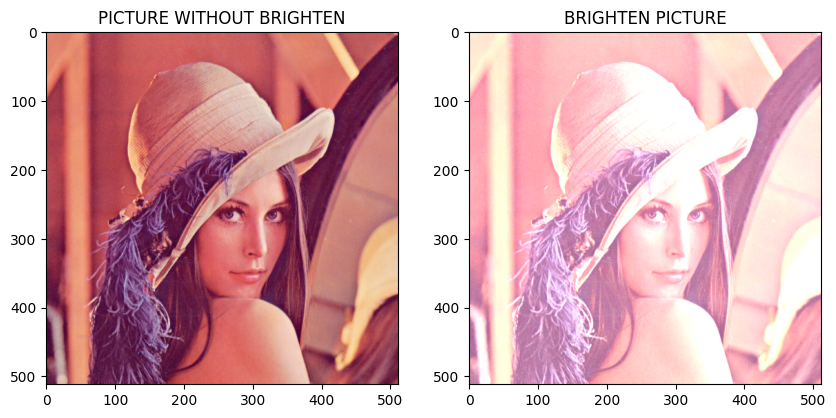

Your picture  Lenna.png  has been processed as  Brighten picture  in 0.7732818126678467 s
 
_________________________________________ Option:  2 - Contrast picture ____________________________________________


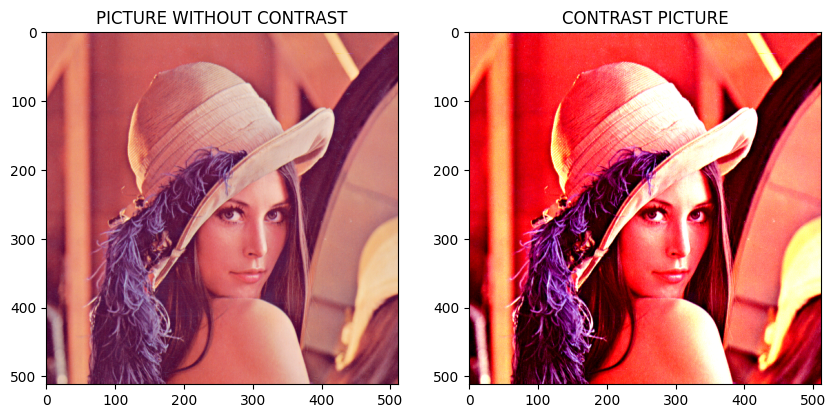

Your picture  Lenna.png  has been processed as  Contrast picture  in 0.8284335136413574 s
 
_____________________________Opt 3 : FLIP IMAGE__________________________________________
ENTER 0 OR 1 TO FLIP BY DIRECTION
0 - Flip Vertically
1 - Flip Horizontally
Your picture has been processed as Flip Picture in 0.032886505126953125 s
 


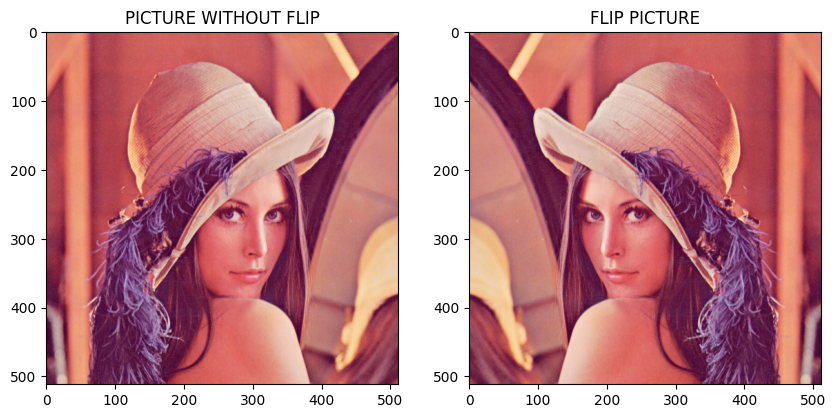

 
_________________________________________ Option:  4 - Grey picture ____________________________________________


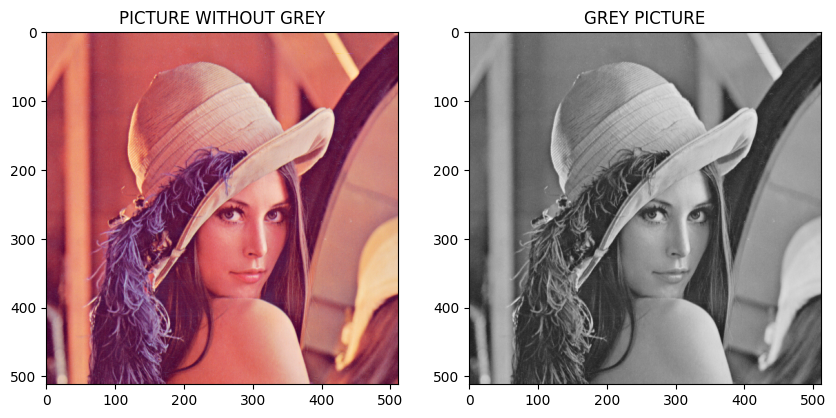

Your picture  Lenna.png  has been processed as  Grey picture  in 0.7211368083953857 s
 
_________________________________________ Option:  5 - Sepia picture ____________________________________________


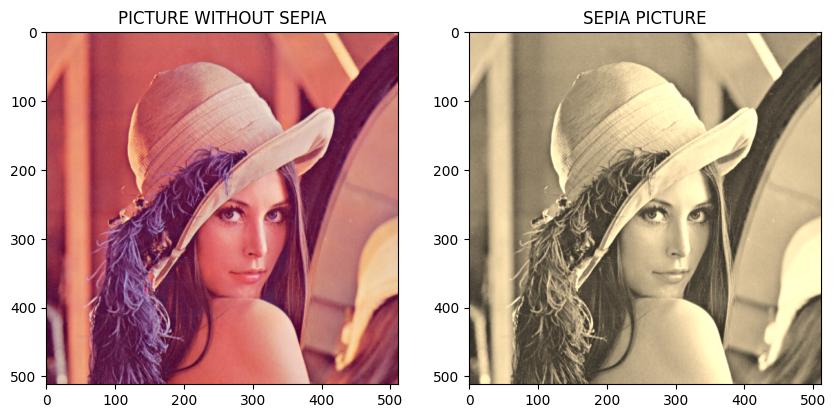

Your picture  Lenna.png  has been processed as  Sepia picture  in 0.8501598834991455 s
 
_________________________________________ Option:  6 - Blur picture ____________________________________________


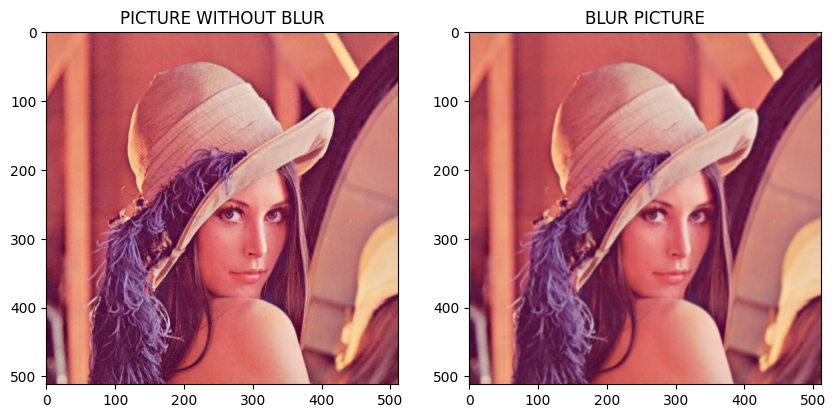

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Your picture  Lenna.png  has been processed as  Blur picture  in 1.0562217235565186 s
 
_________________________________________ Option:  7 - Sharpen picture ____________________________________________


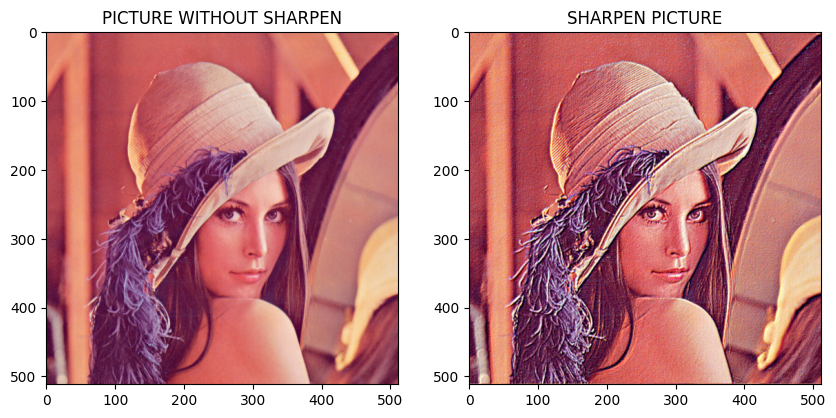

Your picture  Lenna.png  has been processed as  Sharpen picture  in 0.8476638793945312 s
 
_________________________________________ Option:  8 - Cut picture ____________________________________________


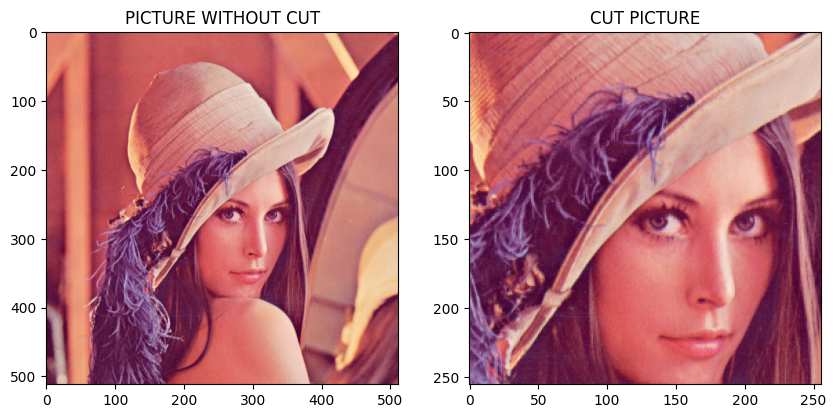

Your picture  Lenna.png  has been processed as  Cut picture  in 0.5603721141815186 s
 
_________________________________________ Option:  9 - Circle Frame picture ____________________________________________


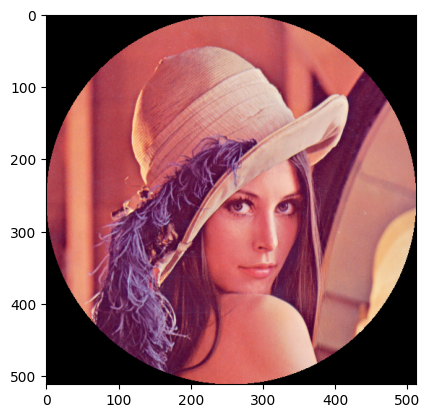

Your picture  Lenna.png  has been processed as  Circle Frame picture  in 0.30812764167785645 s
 
_________________________________________ Option:  10 - Ellipse Frame picture ____________________________________________


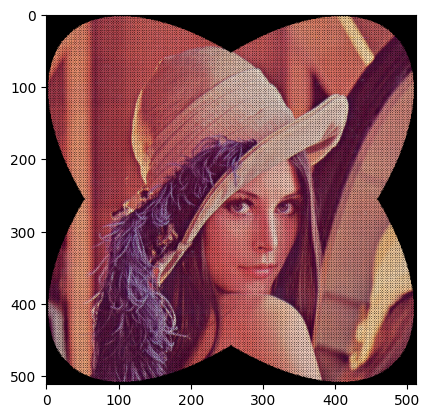

Your picture  Lenna.png  has been processed as  Ellipse Frame picture  in 0.35086798667907715 s


In [105]:
     
def main():
    Opt = [
        "All",
        "Brighten picture", 
        "Contrast picture", 
        "Flip picture (ENTER 0 - Flip Vertically OR 1 - Flip Horizontally)",
        "Grey picture",
        "Sepia picture",
        "Blur picture",
        "Sharpen picture",
        "Cut picture",
        "Circle Frame picture",
        "Ellipse Frame picture"]
    
    print('-------------------IMAGES PROCESSING------------------')
    print('ENTER THE NAME OF THE PICTURE!')
    value = input("Enter picture name: ")
    print('YOUR NAME OF PICTURE IS: ',value)
    print('')
    
    print('--------------------MENU OPTION-----------------------')
    for i in range(len(Opt)):
        print(i, " - ", Opt[i])
    print('')
    
    print('--------------------YOUR CHOICE-----------------------')
    Choice = int(input("Choose Opt: "))
    picture2 = Image.open(value, 'r')
    picture1=picture2
    print('YOUR CHOICE IS: ', Choice)
    print('')
    
    print('                                           ~~~ YOUR IMAGE AFTER PROCESSING ~~~')   
    #Convert picture2
    #All
    processed_picture2 = np.array([])
    if Choice == 0:
        for i in range(1, len(Opt)):
            start_time = time.time()
            processed_picture2 = Process_pic(i, picture2,picture1)
            show_picture2(i, processed_picture2, Opt, picture1)
            Savetofile(i, value, processed_picture2)
            end_time = time.time()
            if i!=3:
                print('Your picture ',value,' has been processed as ',Opt[i],' in', end_time-start_time,'s')
    else:
        start_time = time.time()
        processed_picture2 = Process_pic(Choice, picture2, picture1)
        show_picture2(Choice, processed_picture2, Opt, picture1)
        Savetofile(Choice, value, processed_picture2)
        end_time = time.time()
        if Choice!=3:
            print('Your picture ',value,' has been processed as ',Opt[Choice],' in', end_time-start_time,'s')
    
    
    
main()